In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip (lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | cherskiy
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | paracuru
Processing Record 6 of Set 1 | beypur
City not found. Skipping...
Processing Record 7 of Set 1 | te anau
Processing Record 8 of Set 1 | port hardy
Processing Record 9 of Set 1 | saldanha
Processing Record 10 of Set 1 | termoli
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | okha
Processing Record 13 of Set 1 | dunedin
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | oksfjord
Processing Record 16 of Set 1 | tallahassee
Processing Record 17 of Set 1 | yuncheng
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | sur
Processing Record 22 of Set 1 | bethel
Processing Record 23 of Set 1 | kaeo
Pro

Processing Record 41 of Set 4 | sao domingos do maranhao
Processing Record 42 of Set 4 | barcelos
Processing Record 43 of Set 4 | pitelino
Processing Record 44 of Set 4 | nyrob
Processing Record 45 of Set 4 | mahon
Processing Record 46 of Set 4 | sayyan
Processing Record 47 of Set 4 | abbeville
Processing Record 48 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 49 of Set 4 | tezu
Processing Record 50 of Set 4 | cidreira
Processing Record 1 of Set 5 | corbelia
Processing Record 2 of Set 5 | pontianak
Processing Record 3 of Set 5 | yeppoon
Processing Record 4 of Set 5 | suntar
Processing Record 5 of Set 5 | avarua
Processing Record 6 of Set 5 | troitskoye
Processing Record 7 of Set 5 | bilibino
Processing Record 8 of Set 5 | kavaratti
Processing Record 9 of Set 5 | brorup
Processing Record 10 of Set 5 | saleaula
City not found. Skipping...
Processing Record 11 of Set 5 | kovdor
Processing Record 12 of Set 5 | faanui
Processing Record 13 of Set 5 | pedro juan caballero


Processing Record 29 of Set 8 | hofn
Processing Record 30 of Set 8 | udachnyy
Processing Record 31 of Set 8 | voyvozh
Processing Record 32 of Set 8 | luwuk
Processing Record 33 of Set 8 | moindou
Processing Record 34 of Set 8 | san rafael
Processing Record 35 of Set 8 | australind
Processing Record 36 of Set 8 | mareeba
Processing Record 37 of Set 8 | oga
Processing Record 38 of Set 8 | altay
Processing Record 39 of Set 8 | yinchuan
Processing Record 40 of Set 8 | kaputa
Processing Record 41 of Set 8 | pangai
Processing Record 42 of Set 8 | erzin
Processing Record 43 of Set 8 | new iberia
Processing Record 44 of Set 8 | lida
Processing Record 45 of Set 8 | nunoa
Processing Record 46 of Set 8 | vacha
Processing Record 47 of Set 8 | constitucion
Processing Record 48 of Set 8 | mount gambier
Processing Record 49 of Set 8 | troitskiy
Processing Record 50 of Set 8 | champerico
Processing Record 1 of Set 9 | yen bai
Processing Record 2 of Set 9 | ryotsu
Processing Record 3 of Set 9 | haines 

Processing Record 12 of Set 12 | hami
Processing Record 13 of Set 12 | paita
Processing Record 14 of Set 12 | hirado
Processing Record 15 of Set 12 | lakatoro
Processing Record 16 of Set 12 | xining
Processing Record 17 of Set 12 | bonthe
Processing Record 18 of Set 12 | oussouye
Processing Record 19 of Set 12 | tautira
Processing Record 20 of Set 12 | beloha
Processing Record 21 of Set 12 | husavik
Processing Record 22 of Set 12 | koungou
Processing Record 23 of Set 12 | segezha
Processing Record 24 of Set 12 | honavar
Processing Record 25 of Set 12 | acapulco
Processing Record 26 of Set 12 | alterosa
Processing Record 27 of Set 12 | taltal
Processing Record 28 of Set 12 | ferrol
Processing Record 29 of Set 12 | coquimbo
Processing Record 30 of Set 12 | maniitsoq
Processing Record 31 of Set 12 | stoyba
City not found. Skipping...
Processing Record 32 of Set 12 | tarnogskiy gorodok
Processing Record 33 of Set 12 | irondequoit
Processing Record 34 of Set 12 | aripuana
Processing Record 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cherskiy,68.7500,161.3000,33.98,99,65,10.51,RU,2022-05-13 00:20:10
1,Ancud,-41.8697,-73.8203,48.15,71,33,14.14,CL,2022-05-13 00:20:11
2,Mahebourg,-20.4081,57.7000,71.26,78,63,11.77,MU,2022-05-13 00:20:11
3,East London,-33.0153,27.9116,62.49,79,0,13.91,ZA,2022-05-13 00:15:15
4,Paracuru,-3.4100,-39.0306,82.11,89,25,8.48,BR,2022-05-13 00:20:12
5,Te Anau,-45.4167,167.7167,54.50,67,100,4.56,NZ,2022-05-13 00:20:13
6,Port Hardy,50.6996,-127.4199,50.00,81,75,13.80,CA,2022-05-13 00:20:13
7,Saldanha,-33.0117,17.9442,57.29,82,64,8.52,ZA,2022-05-13 00:16:00
8,Termoli,41.9888,14.9895,64.58,65,14,6.02,IT,2022-05-13 00:20:14
9,Vaini,-21.2000,-175.2000,77.16,57,75,16.11,TO,2022-05-13 00:20:15


In [9]:
new_column_order =["City",'Country','Date','Lat','Lng',"Max Temp",'Humidity','Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2022-05-13 00:20:10,68.7500,161.3000,33.98,99,65,10.51
1,Ancud,CL,2022-05-13 00:20:11,-41.8697,-73.8203,48.15,71,33,14.14
2,Mahebourg,MU,2022-05-13 00:20:11,-20.4081,57.7000,71.26,78,63,11.77
3,East London,ZA,2022-05-13 00:15:15,-33.0153,27.9116,62.49,79,0,13.91
4,Paracuru,BR,2022-05-13 00:20:12,-3.4100,-39.0306,82.11,89,25,8.48
5,Te Anau,NZ,2022-05-13 00:20:13,-45.4167,167.7167,54.50,67,100,4.56
6,Port Hardy,CA,2022-05-13 00:20:13,50.6996,-127.4199,50.00,81,75,13.80
7,Saldanha,ZA,2022-05-13 00:16:00,-33.0117,17.9442,57.29,82,64,8.52
8,Termoli,IT,2022-05-13 00:20:14,41.9888,14.9895,64.58,65,14,6.02
9,Vaini,TO,2022-05-13 00:20:15,-21.2000,-175.2000,77.16,57,75,16.11


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

### Lat vs Temp.

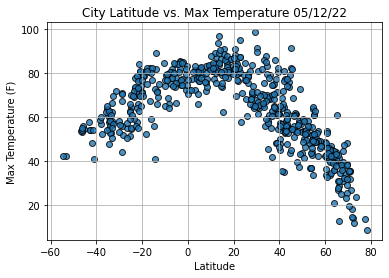

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Lat vs Humidity

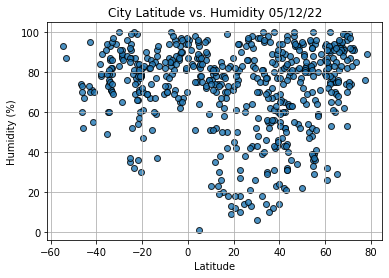

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### Lat vs Cloudiness

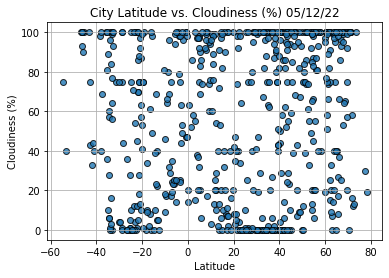

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

### Lat vs Wind Speed

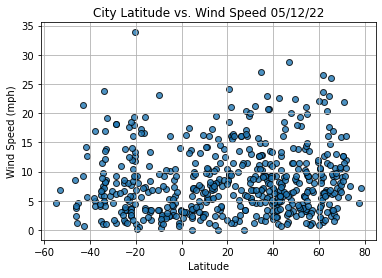

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

### Plot_Linear_Regression - Function

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2022-05-13 00:20:10,68.7500,161.3000,33.98,99,65,10.51
6,Port Hardy,CA,2022-05-13 00:20:13,50.6996,-127.4199,50.00,81,75,13.80
8,Termoli,IT,2022-05-13 00:20:14,41.9888,14.9895,64.58,65,14,6.02
10,Okha,RU,2022-05-13 00:20:15,53.5739,142.9478,36.75,95,100,5.73
12,Albany,US,2022-05-13 00:19:02,42.6001,-73.9662,77.41,60,62,5.03


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Northern Max Temp

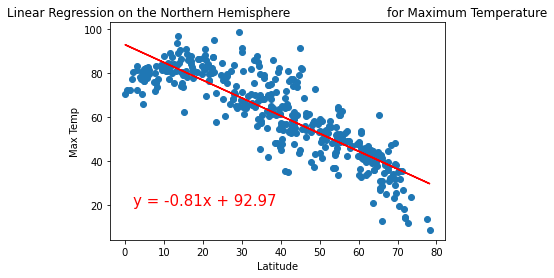

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(2,20))

### Southern Max Temp

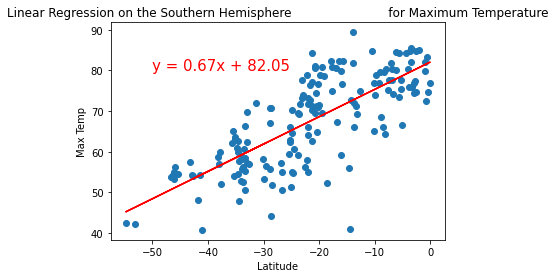

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

### Northern Humidity

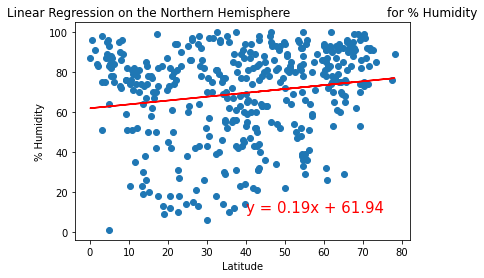

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

### Southern Humidity

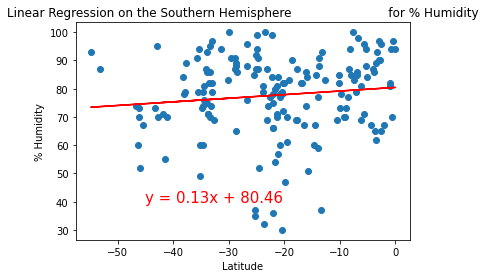

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-45,40))

### Northern Cloudiness

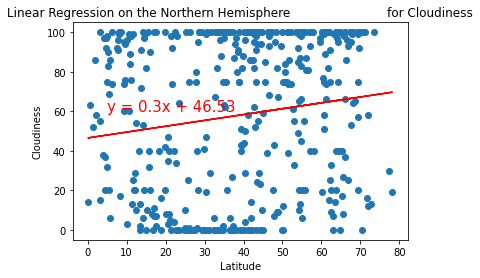

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(5,60))

### Southern Cloudiness

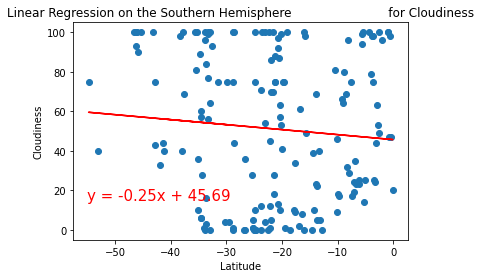

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-55,15))

### Northern Wind Speed

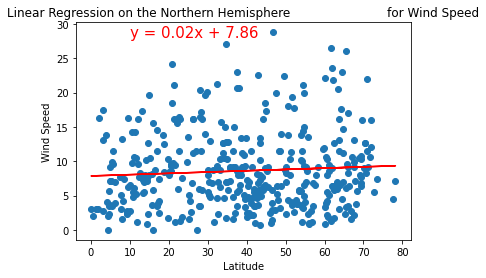

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,28))

### Southern Wind Speed

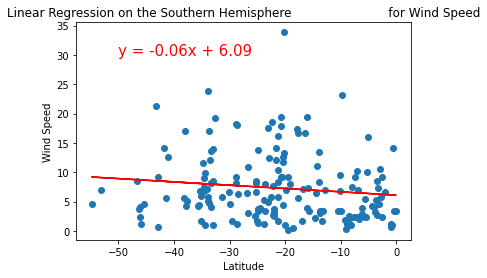

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))